# データ前処理

このノートブックでは、データの前処理を実施し、その効果を確認します。

## 1. 環境設定とデータ読み込み

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# プロジェクトのルートディレクトリを設定
PROJECT_ROOT = Path.cwd().parent

# データディレクトリのパスを設定
DATA_DIR = PROJECT_ROOT / "data"

# データ読み込み用の関数をインポート
from src.data_loader import load_data, preprocess_time
from src.preprocessor import DataPreprocessor

### 1.1 データの読み込み

In [2]:
# データの読み込み
train_df, test_df, feature_desc = load_data(DATA_DIR)

print("訓練データの形状:", train_df.shape)
print("テストデータの形状:", test_df.shape)

訓練データの形状: (26280, 91)
テストデータの形状: (8760, 90)


### 1.2 時間特徴量の前処理

In [3]:
# 時間特徴量の前処理
train_df = preprocess_time(train_df)
test_df = preprocess_time(test_df)

# 時間関連の特徴量を確認
time_features = [col for col in train_df.columns if col in ['hour', 'day_of_week', 'month', 'year']]
print("時間関連の特徴量:")
print(time_features)

時間関連の特徴量:
['hour', 'day_of_week', 'month', 'year']


## 2. データ前処理の実行

In [4]:
# 前処理クラスのインスタンス化
preprocessor = DataPreprocessor()

# 訓練データの前処理
train_processed = preprocessor.fit_transform(train_df.copy())

# テストデータの前処理
test_processed = preprocessor.transform(test_df.copy())

print("前処理後の訓練データの形状:", train_processed.shape)
print("前処理後のテストデータの形状:", test_processed.shape)

前処理後の訓練データの形状: (26280, 113)
前処理後のテストデータの形状: (8760, 112)


## 3. 前処理の効果確認

### 3.1 欠損値の確認

In [5]:
# 欠損値の確認
print("前処理前の欠損値:")
print(train_df.isnull().sum().sum())

print("\n前処理後の欠損値:")
print(train_processed.isnull().sum().sum())

前処理前の欠損値:
321

前処理後の欠損値:
0


### 3.2 外れ値の確認

/var/folders/kx/n7qg75n91k546_mn8bqqgl7h0000gn/T/ipykernel_23802/4192221425.py:12: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kx/n7qg75n91k546_mn8bqqgl7h0000gn/T/ipykernel_23802/4192221425.py:12: UserWarning: Glyph 20966 (\N{CJK UNIFIED IDEOGRAPH-51E6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kx/n7qg75n91k546_mn8bqqgl7h0000gn/T/ipykernel_23802/4192221425.py:12: UserWarning: Glyph 29702 (\N{CJK UNIFIED IDEOGRAPH-7406}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kx/n7qg75n91k546_mn8bqqgl7h0000gn/T/ipykernel_23802/4192221425.py:12: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kx/n7qg75n91k546_mn8bqqgl7h0000gn/T/ipykernel_23802/4192221425.py:12: UserWarning: Glyph 20385 (\N{CJK UNIFIED IDEOGRAPH-4FA1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kx/n7qg75n91k54

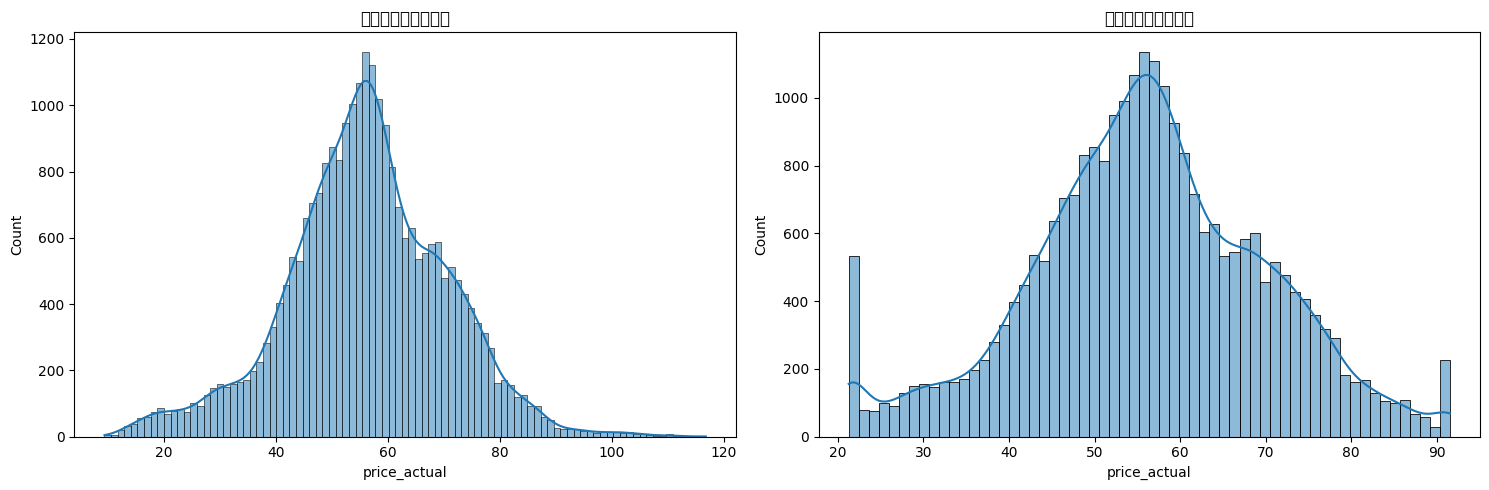

In [6]:
# 目的変数の分布を確認
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 前処理前
sns.histplot(train_df['price_actual'], kde=True, ax=ax1)
ax1.set_title('前処理前の価格分布')

# 前処理後
sns.histplot(train_processed['price_actual'], kde=True, ax=ax2)
ax2.set_title('前処理後の価格分布')

plt.tight_layout()
plt.show()

### 3.3 特徴量エンジニアリングの確認

In [7]:
# 新しく追加された特徴量を確認
new_features = set(train_processed.columns) - set(train_df.columns)
print("新しく追加された特徴量:")
print(sorted(list(new_features)))

新しく追加された特徴量:
['generation_biomass_ratio', 'generation_fossil_brown_coal/lignite_ratio', 'generation_fossil_gas_ratio', 'generation_fossil_hard_coal_ratio', 'generation_fossil_oil_ratio', 'generation_hydro_pumped_storage_consumption_ratio', 'generation_hydro_run_of_river_and_poundage_ratio', 'generation_hydro_water_reservoir_ratio', 'generation_nuclear_ratio', 'generation_other_ratio', 'generation_other_renewable_ratio', 'generation_solar_ratio', 'generation_waste_ratio', 'generation_wind_onshore_ratio', 'is_holiday', 'is_peak_hour', 'is_weekend']


### 3.4 スケーリングの確認

In [8]:
# 数値型の特徴量の統計量を確認
numeric_features = train_processed.select_dtypes(include=[np.number]).columns
print("前処理後の数値特徴量の統計量:")
print(train_processed[numeric_features].describe())

前処理後の数値特徴量の統計量:
       generation_biomass  generation_fossil_brown_coal/lignite  \
count        2.628000e+04                          2.628000e+04   
mean         3.114708e-16                          5.191180e-17   
std          1.000019e+00                          1.000019e+00   
min         -2.956821e+00                         -1.313243e+00   
25%         -6.431197e-01                         -1.313243e+00   
50%         -2.325349e-01                          2.301513e-01   
75%          8.993476e-01                          1.048369e+00   
max          2.142199e+00                          1.420535e+00   

       generation_fossil_gas  generation_fossil_hard_coal  \
count           2.628000e+04                 2.628000e+04   
mean           -8.651966e-17                -1.687133e-16   
std             1.000019e+00                 1.000019e+00   
min            -2.487417e+00                -2.188369e+00   
25%            -7.205647e-01                -8.978555e-01   
50%           

## 4. 前処理済みデータの保存

In [9]:
# 前処理済みデータの保存
train_processed.to_csv(DATA_DIR / "train_processed.csv", index=False)
test_processed.to_csv(DATA_DIR / "test_processed.csv", index=False)

print("前処理済みデータを保存しました。")

前処理済みデータを保存しました。
